## Flipkart Mobile Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mobile_df = pd.read_csv('Flipkart_Mobiles.csv')
mobile_df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


### Data Exporation

In [3]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [4]:
mobile_df.drop_duplicates(inplace=True)

In [5]:
mobile_df.isnull().sum()
mobile_df.dropna(inplace=True)

In [6]:
mobile_df.describe()

,Rating,Selling Price,Original Price
count,2806.000000,2806.000000,2806.000000
mean,4.233820,23910.539558,25847.511404
std,0.271603,25666.067716,27572.583577
min,2.300000,1000.000000,1000.000000
25%,4.100000,9900.000000,9999.000000
50%,4.300000,14999.000000,15999.000000
75%,4.400000,25999.000000,28999.000000
max,5.000000,179900.000000,189999.000000


### Exprolation Data Analysis

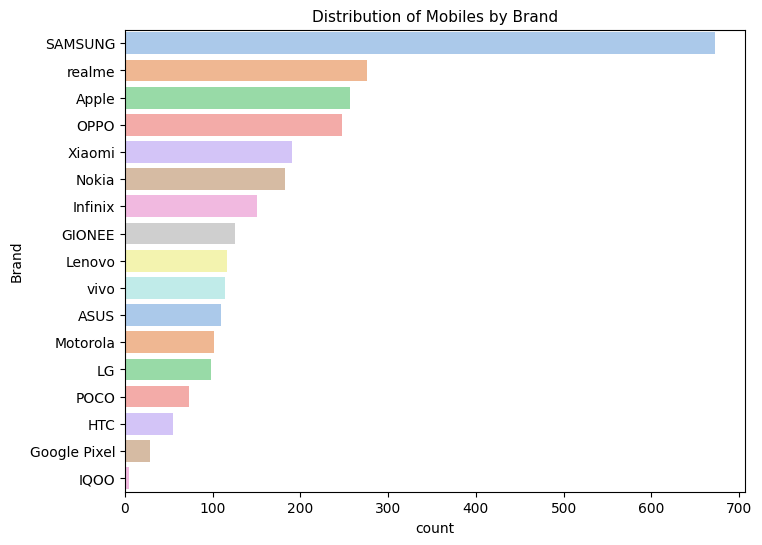

In [35]:
# I counted the values of the Brand column, then I made a bar plot to see which brand had the highest sales.
highest_brand_mb = mobile_df['Brand'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=highest_brand_mb.values , y= highest_brand_mb.index,palette='pastel')
plt.title('Distribution of Mobiles by Brand', fontsize=11)
plt.xlabel('count')
plt.show()

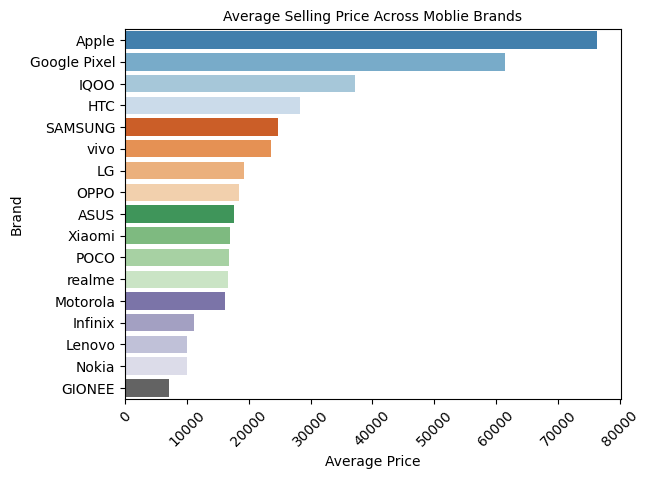

In [40]:
# By grouping between the two columns, we calculated the average, then created a barplot to see which phone sold the most.
budget_of_brand = mobile_df.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False)
sns.barplot(x=budget_of_brand.values, y=budget_of_brand.index, palette='tab20c')
plt.title('Average Selling Price Across Moblie Brands', fontsize=10)
plt.xlabel("Average Price")
plt.xticks(rotation=45)
plt.show()

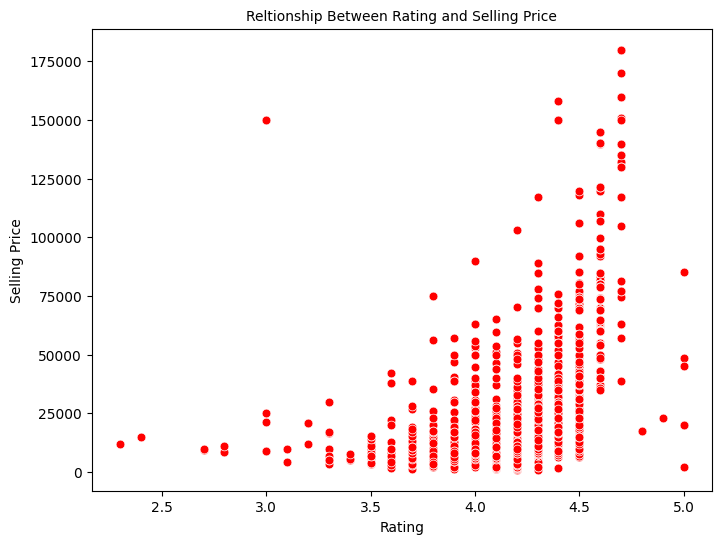

In [9]:
# I have created a scatter plot in this graph it is seen that as the rating increase the selling price also increases.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='Selling Price', data=mobile_df,s=40, color='red')
plt.title("Reltionship Between Rating and Selling Price", fontsize=10)
plt.show()

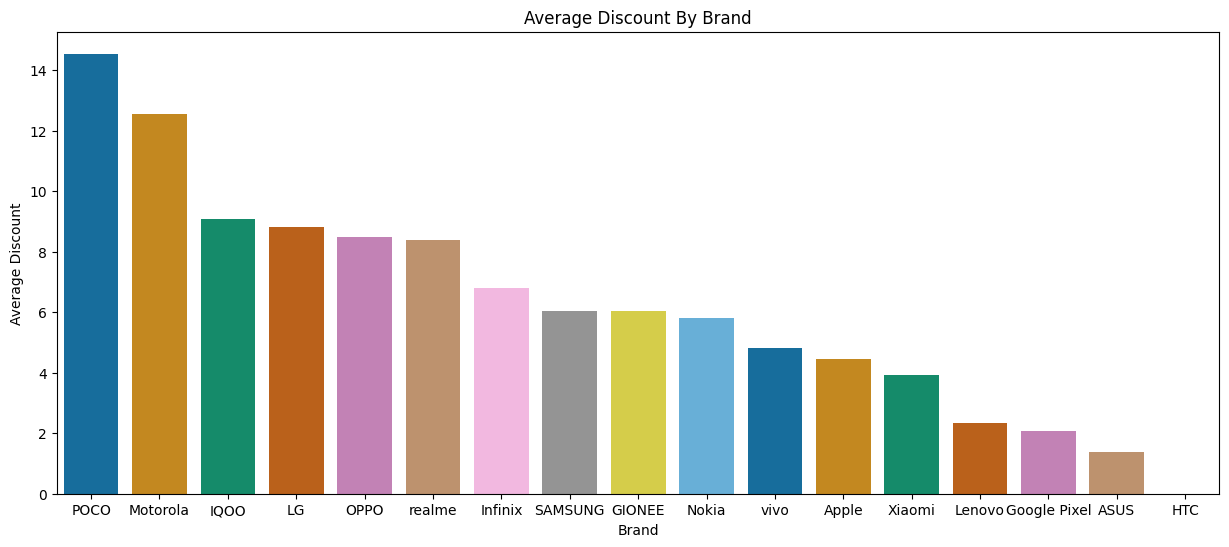

In [11]:
# Calculating discount percentage for each mobile by comparing Original Price and Selling Price
mobile_df["Discount"] = ((mobile_df['Original Price']- mobile_df['Selling Price']) / mobile_df['Original Price']) * 100
average_dc_brand = mobile_df.groupby('Brand')["Discount"].mean().round(2).sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=average_dc_brand.index, y=average_dc_brand.values, palette='colorblind')
plt.title("Average Discount By Brand")
plt.xlabel('Brand')
plt.ylabel('Average Discount')
plt.show()

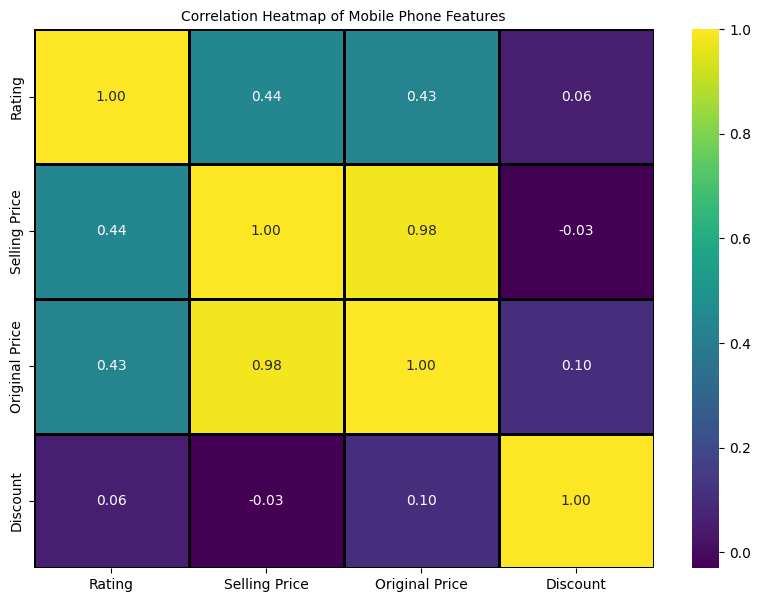

In [34]:
# Selecting numeric feature columns for correlation analysis
colum_df = mobile_df[['Rating','Selling Price', 'Original Price', 'Discount']]
numeric_corr = colum_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=numeric_corr, annot=True, cmap='viridis',fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of Mobile Phone Features',fontsize=10)
plt.show()